In [ ]:
Individual evaluation report can be found in Model_Evaluation folder where each SLM
was evaluated with a set of prompts across 2 different similarity search algorithms
1. L2 (default for ChromaDB search) using k = 5 
2. Inner Product using similarity threshold of 0.5
3. Using inner product  of similarity threshold = 0.4 with finetuned
sentence transformer on application data and a filtering mechanism 
to index vector db by patient mrn and patient name using regex extraction.

The SLM response was manually evaluated using human evaluation via SQL queries on backend MySQL table. 
The prompts were converted to native MySQL queries and results were compared with SLM response. 
For accuracy score below a weighted model is used since it was determined that 'partially correct'
summaries was due to faults in similarity search model. Therefore the goal of this project is to
enhance the similarity searches and provide more targetted context to SLM for summary generation


Mistral 7B weighted score: 5.5
Gemma 2B weighted score: 3.0


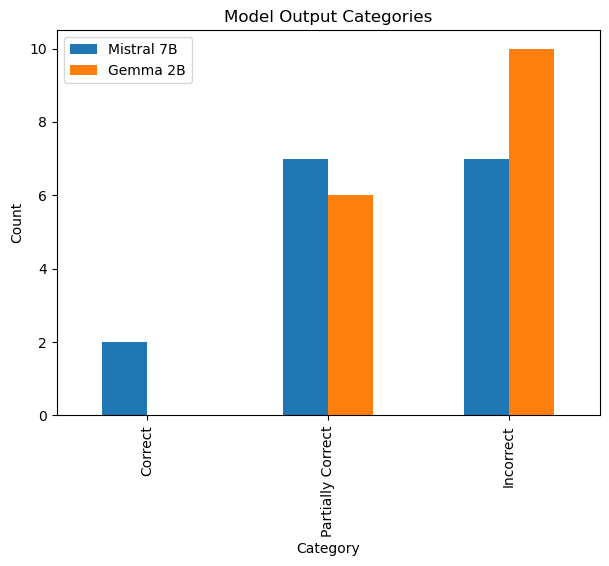

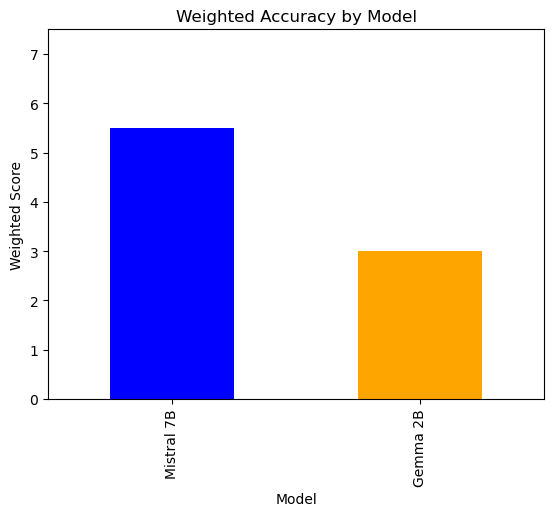

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

categories = ['Correct', 'Partially Correct', 'Incorrect']
mistral_7b = [2, 7, 7]
gemma_2b = [0, 6, 10]

df = pd.DataFrame({
    'Category': categories,
    'Mistral 7B': mistral_7b,
    'Gemma 2B': gemma_2b
})
weights = [1, 0.5, 0]  # Correct=1, Partially Correct=0.5, Incorrect=0

df['Mistral Weighted'] = df['Mistral 7B'] * weights
df['Gemma Weighted'] = df['Gemma 2B'] * weights

mistral_score = df['Mistral Weighted'].sum()
gemma_score = df['Gemma Weighted'].sum()

print(f'Mistral 7B weighted score: {mistral_score}')
print(f'Gemma 2B weighted score: {gemma_score}')
df_plot = df.set_index('Category')[['Mistral 7B', 'Gemma 2B']]
df_plot.plot(kind='bar', figsize=(7,5), ylabel='Count', title='Model Output Categories')
plt.show()
acc_df = pd.DataFrame({
    'Model': ['Mistral 7B', 'Gemma 2B'],
    'Weighted Accuracy': [mistral_score, gemma_score]
})

acc_df.plot(x='Model', y='Weighted Accuracy', kind='bar', legend=False, color=['blue', 'orange'],
            title='Weighted Accuracy by Model', ylabel='Weighted Score')
plt.ylim(0, max(mistral_score, gemma_score) + 2)
plt.show()


L2 Similarity Weighted Score: 5.5
Inner Product Weighted Score: 5.5


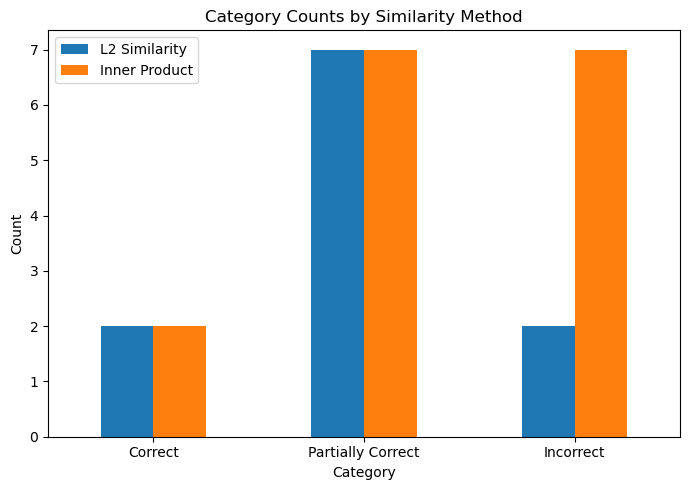

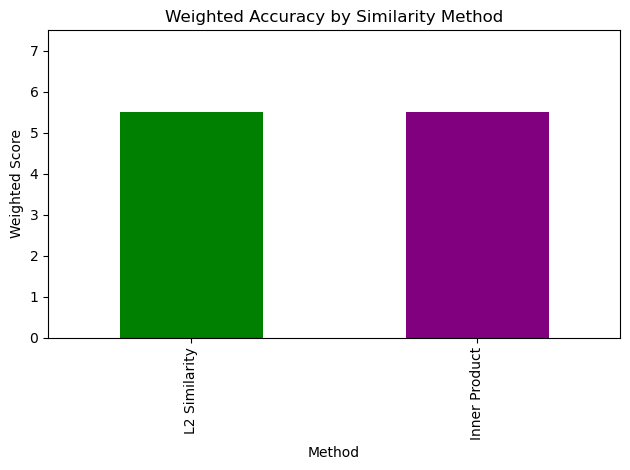

In [4]:
# Data
categories = ['Correct', 'Partially Correct', 'Incorrect']
l2_similarity_search = [2, 7, 2]
inner_product = [2, 7, 7]

# Create DataFrame
df = pd.DataFrame({
    'Category': categories,
    'L2 Similarity': l2_similarity_search,
    'Inner Product': inner_product
})

# Define weights: Correct=1, Partially Correct=0.5, Incorrect=0
weights = [1, 0.5, 0]

# Weighted calculations
df['L2 Weighted'] = df['L2 Similarity'] * weights
df['IP Weighted'] = df['Inner Product'] * weights

# Final weighted scores
l2_score = df['L2 Weighted'].sum()
ip_score = df['IP Weighted'].sum()

print(f"L2 Similarity Weighted Score: {l2_score}")
print(f"Inner Product Weighted Score: {ip_score}")

# Plot raw category counts
df_plot = df.set_index('Category')[['L2 Similarity', 'Inner Product']]
df_plot.plot(kind='bar', figsize=(7,5), title='Category Counts by Similarity Method', ylabel='Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
acc_df = pd.DataFrame({
    'Method': ['L2 Similarity', 'Inner Product'],
    'Weighted Accuracy': [l2_score, ip_score]
})

acc_df.plot(x='Method', y='Weighted Accuracy', kind='bar', legend=False, color=['green', 'purple'],
            title='Weighted Accuracy by Similarity Method', ylabel='Weighted Score')
plt.ylim(0, max(l2_score, ip_score) + 2)
plt.tight_layout()
plt.show()


Inner product was chosen as choice of algorithm for RAG model since it encompasses more relevant context and is not restrictive to a discrete size of K as in nearest neighbours. 
To enhance context retrieval - all-MiniLM-L6-v2 was fine tuned on application summary data. In addition a regex extraction was added to pull patient name and patient mrn in user product which provided basis for indexing vector db. This enhancement gave more specific context to SLM (optimized parameters) 

In [ ]:
#Fine tuned all-MininLM-L6-v2 results.
17%|█▋        | 8/48 [00:50<03:42,  5.57s/it]{'eval_val_pearson_cosine': 0.8168691685758459, 'eval_val_spearman_cosine': 0.6221504176814271, 'eval_runtime': 3.7279, 'eval_samples_per_second': 0.0, 'eval_steps_per_second': 0.0, 'epoch': 0.5}
  33%|███▎      | 16/48 [01:46<03:18,  6.20s/it]{'eval_val_pearson_cosine': 0.8527565956989378, 'eval_val_spearman_cosine': 0.620982060089537, 'eval_runtime': 5.6059, 'eval_samples_per_second': 0.0, 'eval_steps_per_second': 0.0, 'epoch': 1.0}
  50%|█████     | 24/48 [04:23<09:03, 22.64s/it]{'eval_val_pearson_cosine': 0.870146415446412, 'eval_val_spearman_cosine': 0.6221504176814271, 'eval_runtime': 10.8731, 'eval_samples_per_second': 0.0, 'eval_steps_per_second': 0.0, 'epoch': 1.5}
  67%|██████▋   | 32/48 [07:04<03:01, 11.32s/it]{'eval_val_pearson_cosine': 0.8790783403156512, 'eval_val_spearman_cosine': 0.626823848048987, 'eval_runtime': 7.6208, 'eval_samples_per_second': 0.0, 'eval_steps_per_second': 0.0, 'epoch': 2.0}
  83%|████████▎ | 40/48 [08:22<01:09,  8.63s/it]{'eval_val_pearson_cosine': 0.8821762144555576, 'eval_val_spearman_cosine': 0.6303289208246572, 'eval_runtime': 4.7064, 'eval_samples_per_second': 0.0, 'eval_steps_per_second': 0.0, 'epoch': 2.5}
 100%|██████████| 48/48 [09:40<00:00,  8.16s/it]{'eval_val_pearson_cosine': 0.8828440573817351, 'eval_val_spearman_cosine': 0.6303289208246572, 'eval_runtime': 4.7177, 'eval_samples_per_second': 0.0, 'eval_steps_per_second': 0.0, 'epoch': 3.0}
 {'train_runtime': 584.966, 'train_samples_per_second': 2.6, 'train_steps_per_second': 0.082, 'train_loss': 0.08357433478037517, 'epoch': 3.0}
 100%|██████████| 48/48 [09:44<00:00, 12.19s/it]
 Training finished. Best model saved in: finetuned-all-MiniLM-L6-v2

In conjunction to fine tuning the transformer - there was also more targetted prompt engineering measures taken for next evaluation. 

Finetuned Targeted Prompts score: 11.0
Default Inner Product score: 5.5


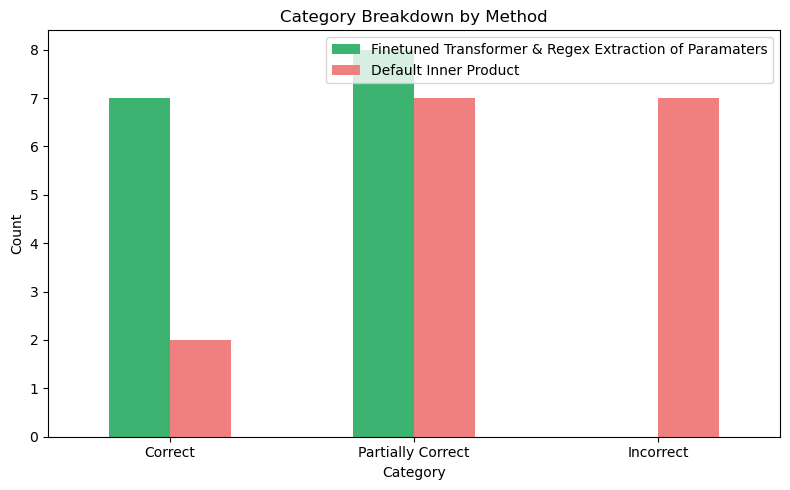

In [12]:
# Input data
categories = ['Correct', 'Partially Correct', 'Incorrect']
finetuned_filtered_ip = [7, 8, 0]
default_ip = [2, 7, 7]
weights = [1.0, 0.5, 0.0]

# Create DataFrame
df = pd.DataFrame({
    'Category': categories,
    'Finetuned Transformer & Regex Extraction of Paramaters': finetuned_filtered_ip,
    'Default Inner Product': default_ip
})

# Calculate weighted score for each method
df['Finetuned Weighted'] = df['Finetuned Transformer & Regex Extraction of Paramaters'] * weights
df['Default IP Weighted'] = df['Default Inner Product'] * weights

# Total weighted scores
finetuned_score = df['Finetuned Weighted'].sum()
default_ip_score = df['Default IP Weighted'].sum()

print(f"Finetuned Targeted Prompts score: {finetuned_score}")
print(f"Default Inner Product score: {default_ip_score}")
# Plot category-wise counts
df_plot = df.set_index('Category')[['Finetuned Transformer & Regex Extraction of Paramaters', 'Default Inner Product']]
df_plot.plot(kind='bar', figsize=(8, 5), title='Category Breakdown by Method',
             ylabel='Count', color=['mediumseagreen', 'lightcoral'])
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
# Create DataFrame for weighted accuracy comparison
score_df = pd.DataFrame({
    'Method': ['Finetuned Transformer & Regex Extraction of Paramaters', 'Default Inner Product'],
    'Weighted Accuracy': [finetuned_score, default_ip_score]
})




